## Exploratory Visual Analysis of Superstore Dataset

### 1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# path into a string 
path= r'C:\Users\Carolina\Documents\CareerFoundry\Data Immersion\Achievement 6- Advanced Analytics & Dashboard Design'

In [3]:
# Import dataset into Jupyter as df_st  
df_ss = pd.read_csv(os.path.join(path, '02-SS Data','Prepared Data' ,'Superstore2.csv'))

### 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

QUESTIONS  
-Which categories and regions contribute to the highest sales? 
<br>-Do sales move in the same direction as discounts? 
<br>-How can we segment the data to analyse profit? 

The variables I will use for the exploratory visual analysis are sales, profit, discount, region, quantity, category, segment, and subcategory. 

### 3. Create a correlation matrix heatmap (colored). 
<b>Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [5]:
df_ss.corr()

Discount    Profit  Quantity     Sales
Discount  1.000000 -0.219481  0.008680 -0.028197
Profit   -0.219481  1.000000  0.066241  0.479067
Quantity  0.008680  0.066241  1.000000  0.200808
Sales    -0.028197  0.479067  0.200808  1.000000

Text(0.5, 1.0, 'Correlation Matrix')

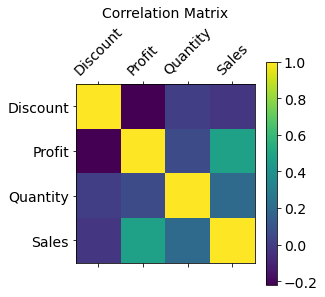

In [6]:
# Create a correlation heatmap using matplotlib

y=['Discount', 'Profit', 'Quantity', 'Sales']
x=['Discount', 'Profit', 'Quantity', 'Sales']
f = plt.figure(figsize=(4, 4)) # figure size 
plt.matshow(df_ss.corr(), fignum=f.number) # type of plot
plt.xticks(ticks=np.arange(4) ,labels= x, fontsize=14, rotation=45) # x axis labels
plt.yticks(ticks=np.arange(4) ,labels= y, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [7]:
subset = df_ss[['Discount', 'Profit', 'Quantity', 'Sales']] 

In [8]:
subset.head()

Discount    Profit  Quantity     Sales
0      0.00   41.9136         2  261.9600
1      0.00  219.5820         3  731.9400
2      0.00    6.8714         2   14.6200
3      0.45 -383.0310         5  957.5775
4      0.20    2.5164         2   22.3680

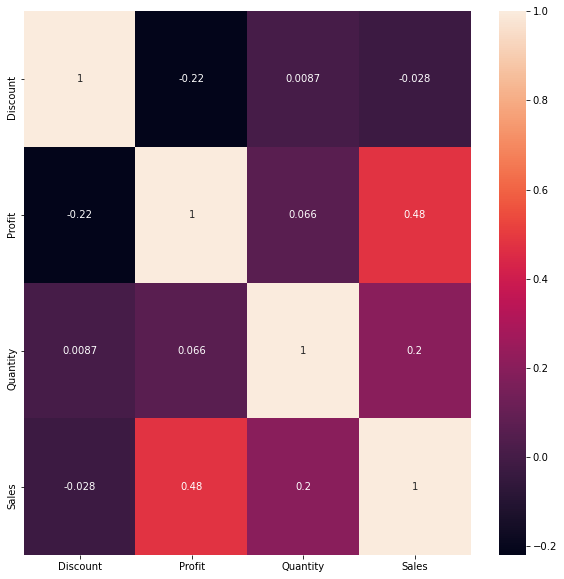

In [9]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(subset.corr(), annot = True, ax = ax) 


In [10]:
#save visualization
corr.figure.savefig(os.path.join(path, '04-SS Analysis','visualizations', 'correlation_EDA.png'))

For this analysis, profit  will be treated as the dependent variable. <br> 
Only sales shows a moderate relationship (0.48), moving in the same direction as profit. The weakest relationship is with quantity (0.066), which implies that to higher quantitites higher profit. Discounts have a weak negative correlation with profit,which makes sense as the discount is lower the profit is not so affected (-0.22). <br> Furthermore, what these correlations suggests is the weak linear interdependence among them, however we would explore this further in the next point.   

### Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. <br> Discuss the output in a markdown cell.

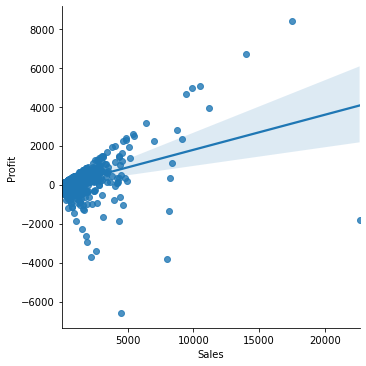

In [11]:
# Create a scatterplot for the "sales" and "profit" columns in seaborn

a= sns.lmplot(x = 'Sales', y = 'Profit', data = df_ss)
a

This scaterred plot shows that there are a lot of outliers which is evidence by the points that are not close to the positive trend line. Therefore, this variation is what gives the correlation a moderate value instead of a high one. 

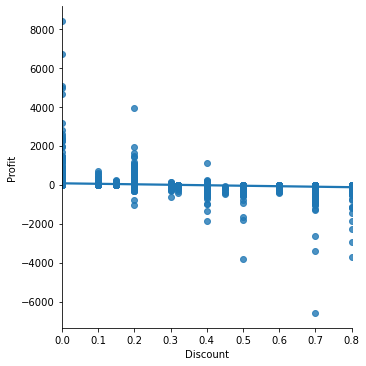

In [10]:
sns.lmplot(x = 'Discount', y = 'Profit', data = df_ss)

Although, a weak correlation among these two variables one can see the negative relation, although with a strong dispersion. 

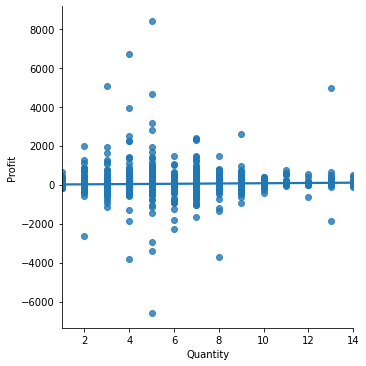

In [11]:
sns.lmplot(x = 'Quantity', y = 'Profit', data = df_ss)

On the other hand, this plot shows the almost inexistent linear relation between sales and discount. 

### 5. Create a pair plot of the entire data set. <br>Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

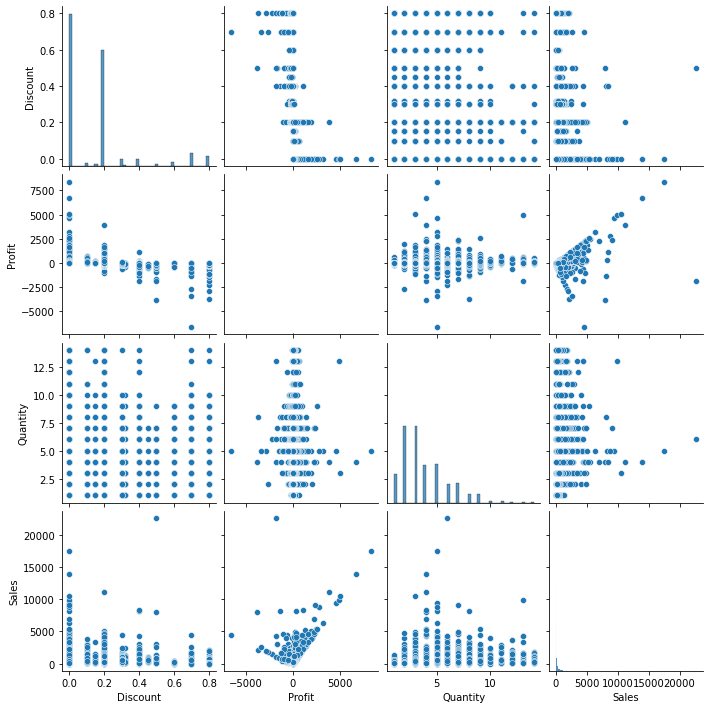

In [12]:
# Create a pair based on the subset used for creating the heatmap
g = sns.pairplot(subset)

The variables that are worth exploring further to explain the variation of sales are profit since it is the one showing a more linear interdependence.  

As for the distibutions, it is noticeable that most of the quantities per order are below 5 units, most discounts per order are less than 20% and sales are around 55 dollars. 

### 6. Create a categorical plot and interpret the results.

C:\Users\Carolina\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

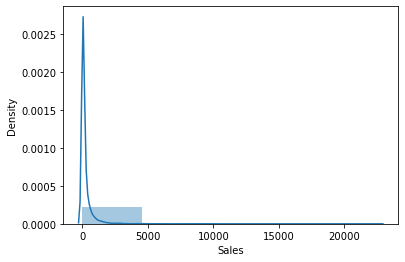

In [13]:
# Let's explore the distribution of sales to see if we if can categorize them by high, low and medium purchase
sns.distplot(df_ss['Sales'], bins = 5)

Given that it is hard to distinguish the values between $\$$0 and $\$$5000 dollars, then we will retrive values based on the mean and the median values. 

In [14]:
df_ss['Sales'].median()

54.48

In [15]:
df_ss['Sales'].mean()

229.85284582207007

In [4]:
# Create a new column, named price_category
df_ss.loc[df_ss['Sales'] < 54.48, 'type purchase'] = 'Low purchase'

In [5]:
df_ss.loc[(df_ss['Sales'] >= 54.48) & (df_ss['Sales'] < 230), 'type purchase'] = 'Medium purchase'

In [6]:
df_ss.loc[df_ss['Sales'] >= 230, 'type purchase'] = 'Big purchase'

In [18]:
df_ss['type purchase'].value_counts(dropna = False)

Low purchase       4996
Medium purchase    2639
Big purchase       2358
Name: type purchase, dtype: int64

In [19]:
df_ss.columns

Index(['Category', 'City', 'Country', 'Customer Name', 'Discount',
       'Order Date', 'Order ID', 'Manufacturer', 'Product Name', 'Profit',
       'Quantity', 'Region', 'Sales', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category', 'type purchase'],
      dtype='object')

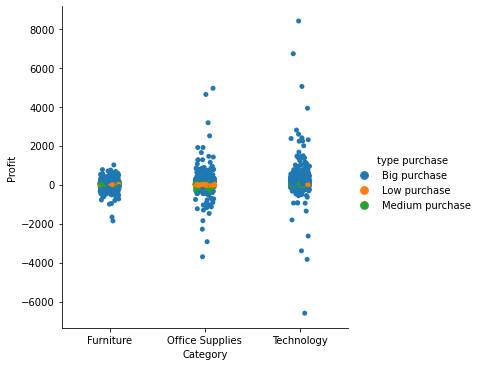

In [20]:
# Create a categorical plot in seaborn using the price categories created above

a= sns.catplot(x="Category", y="Profit", hue= 'type purchase', data=df_ss)
a

In this graph we can see the distribution of profit, by category and broken down by type of purchase.  Notice how low and medium purchases contribute to almost zero profit in all categories, while big purchases are responsible for negative and positive results of profit.   

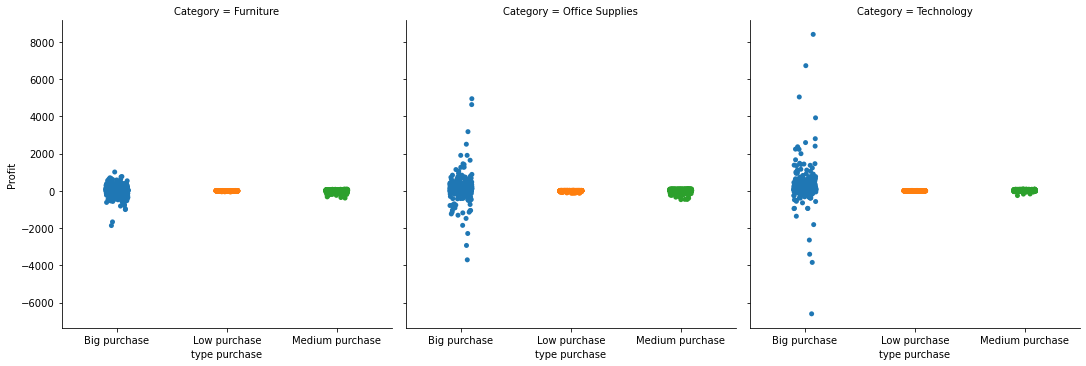

In [22]:
# Create another catplot where it is possible to get a bigger detail by category
sns.catplot(x="type purchase", y="Profit", col= 'Category', data=df_ss)

When we explore deeper by category, we can see more dispersion for big purchases in technology, followed by office supplies. Medium purchases for all categories leads mostly to negative results in profit. 

<AxesSubplot:xlabel='Category', ylabel='Profit'>

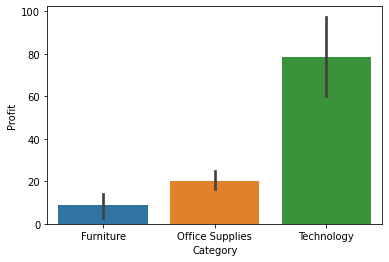

In [23]:
# Now let's explore the average profit using the same categorical variables using a barplot
sns.barplot(x='Category', y= 'Profit', data= df_ss)

Technology has the highest average profit per category. 

<AxesSubplot:xlabel='Category', ylabel='Profit'>

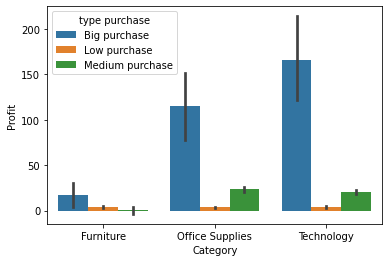

In [24]:
sns.barplot(x='Category', y= 'Profit', data= df_ss, hue='type purchase')

Inside Technology, we can see that purchases that are equal or over $\$$230 the average profit is higher, and this same logic applies to all categories.

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

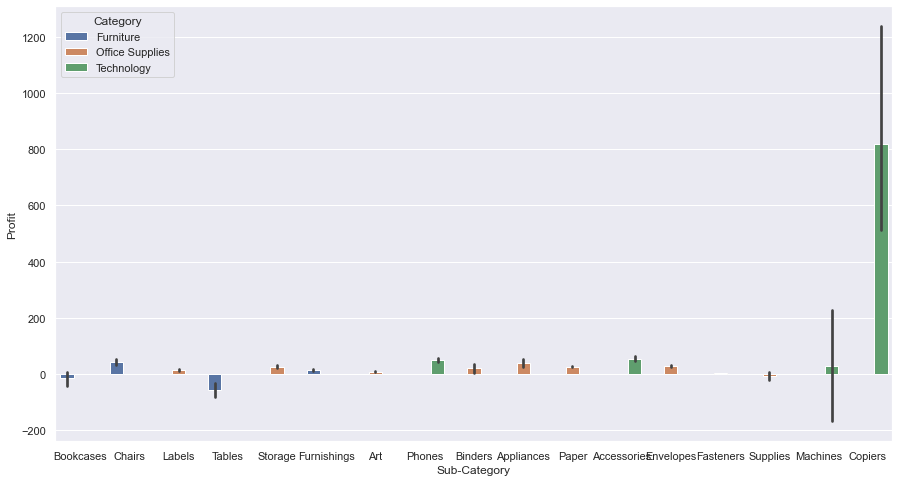

In [25]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x='Sub-Category', y= 'Profit', data= df_ss, hue='Category')

Lastly, subcategories such as tables and bookcases should be discontinued as they are making Super Store loose money. Copiers is a subcategory worth of incentivizing its sales.  

   ### 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

#### QUESTIONS
<b>-Which categories and regions contribute to the highest sales?


<AxesSubplot:xlabel='Category', ylabel='Sales'>

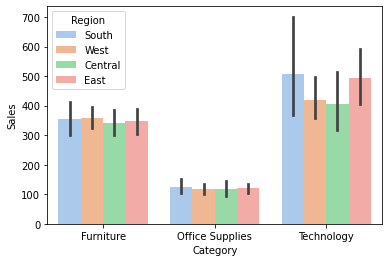

In [7]:
sns.barplot(x='Category', y= 'Sales', data= df_ss, hue='Region', palette= 'pastel')

Technology in the South and East is were sales are the highest. 

<b>-Do sales move in the same direction as discounts?


As shown in the correlation matrix, sales and discounts do not have any relationsip (correlation coeficient= -0.028).  

#### New Questions: 
<br> -From the big purchases of Electronics, which products most contributed to profit? <br> -Which categories should SuperStore consider discontinue its selling? <br> - Where are the big profitable purchases concentrated? And among which and how many customers? <br> -If there is no strong relation between sales and discounts, is it worth to continue doing discounts?   

### 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

For doing the hypothesis test we need to define a dependent and independent variable. Taking the highest correlations with profit, the independent variable will be sales and the dependent one, profit. <br> After having done some exploratory analysis we can test the following hypothesis:   


<b> Null Hypothesis: The profitability of purchases superior or equal to $\$$230 from electronics is less than purchases inferior to $\$$230 from electronics <br>
${Ho} : {\mu}_{Big Purchases Electronics} < {\mu}_{Medium and Small Purchases Electronics} $

<b> Alternative Hypothesis: The profitability of purchases superior or equal to $\$$230 from electronics is more than purchases inferior to $\$$230 from electronics. <br>
${H_1} : {\mu}_{Big Purchases Electronics} > {\mu}_{Medium and Small and Purchases Electronics} $

This is considered a one-tailed test. 

In [27]:
#Export data 
df_ss.to_csv((os.path.join(path, '02-SS Data','Prepared Data','Superstore3.csv')), index=False)

In [29]:
df_ss[df_ss['Sales']<0]

Empty DataFrame
Columns: [Category, City, Country, Customer Name, Discount, Order Date, Order ID, Manufacturer, Product Name, Profit, Quantity, Region, Sales, Segment, Ship Date, Ship Mode, State, Sub-Category, type purchase]
Index: []